# Time Series

In [152]:
# Clears all user-defined variables, functions, and imports without asking for confirmation.
%reset -f

In [35]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
# from scipy.interpolate import interp1d
# from dtaidistance import dtw
# from scipy.stats import pearsonr

# 3 Preliminaries and Problem Statement

## 3.1 Euclidean Distance (ED)

Self-implemented ED

In [ ]:


def euclidean_distance(ts1, ts2):
    ts1 = np.array(ts1)
    ts2 = np.array(ts2)
    return np.sqrt(np.sum((ts1 - ts2)**2))
    

In [32]:
def squared_euclidean_distance(ts1, ts2):
    ts1 = np.array(ts1)
    ts2 = np.array(ts2)
    return np.sum((ts1 - ts2)**2)

In [36]:
# Data from https://jmotif.github.io/sax-vsm_site/morea/algorithm/znorm.html
q = pd.Series(np.array([2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34]))
c = pd.Series(np.array([-0.12, -0.16, -0.13,  0.28,  0.37,  0.39,  0.18,  0.09,  0.15, -0.06,  0.06, -0.07, -0.13, -0.18, -0.26]))

In [39]:
euclidean_distance(q, c), squared_euclidean_distance(q, c)

(np.float64(19.942780648645765), np.float64(397.7145))

In [42]:
# https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.distances.euclidean_distance.html
# https://www.sktime.net/en/latest/api_reference/auto_generated/sktime.distances.squared_distance.html
from sktime.distances import euclidean_distance as sktime_ed, squared_distance as sktime_ed_sq
sktime_ed(q.to_numpy(), c.to_numpy()), sktime_ed_sq(q.to_numpy(), c.to_numpy())


(19.942780648645765, 397.7145)

## 3.3 Uniform Scaling (US)

## Interpolation

In [179]:
# from scipy.ndimage import zoom
# def nearest_neighbor_interpolation(ts, new_length):
#     # order = 0 for nearest neighbor interpolation
#     return zoom(ts, new_length/len(ts), order=0)


In [180]:
# def nearest_neighbor_interpolation2(ts, new_length):
#     old_length = len(ts)
#     indices = np.ceil(np.linspace(1, old_length, new_length)).astype(int) - 1  # -1 for 0-based indexing
#     return np.array(ts)[indices]

In [43]:
def nearest_neighbor_interpolation(ts, L):
    ts = np.asarray(ts)
    k = len(ts)
    indices = [int(np.ceil(j * k / L)) - 1 for j in range(1, L + 1)]  # Why -1? 1-based (in the paper) to 0-based (default in Python)
    return ts[indices]

In [44]:
# https://stackoverflow.com/questions/66934748/how-to-stretch-an-array-to-a-new-length-while-keeping-same-value-distribution
def linear_interpolation(array: np.ndarray, new_len: int) -> np.ndarray:
    la = len(array)
    return np.interp(np.linspace(0, la - 1, num=new_len), np.arange(la), array)

In [50]:
ts = np.array([1,2,3,4,5,6])
nearest_neighbor_interpolation(ts, 8)

array([1, 2, 3, 3, 4, 5, 6, 6])

In [52]:
def normalize(ts):
    mean = np.mean(ts)
    std = np.std(ts)
    return (ts - mean) / std

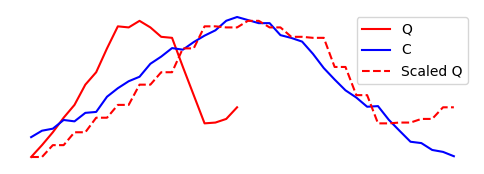

In [53]:
np.random.seed(0)
q = np.cumsum(np.random.rand(20) * 2 - 1 + np.sin(np.linspace(0, 2 * np.pi, 20)))
c = np.cumsum(np.random.rand(40) * 2 - 1 + np.sin(np.linspace(0, 2 * np.pi, 40)))
# c_x2 = np.linspace(0, 1, 10)
# c_y2 = np.piecewise(c_x2, [c_x2 < 0.5, c_x2 >= 0.5], [lambda x: 2*x, lambda x: 2*(1-x)])
# c_y2 = c_y2 *5
# offset = c[-1] - c_y2[0]
# c_y2 = c_y2 + offset
# c = np.concatenate([c, c_y2])
q_scaled = nearest_neighbor_interpolation(q, len(c))

q = normalize(q)
c = normalize(c)
q_scaled = normalize(q_scaled)

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(6, 2))

ax1.plot(q, label='Q', color='red')
ax1.plot(c, label='C', color='blue')
ax1.plot(q_scaled, label='Scaled Q', linestyle='--', color='red')

# ax1.set_title('Example of US')
ax1.legend()

# https://stackoverflow.com/questions/9295026/how-to-remove-axis-legends-and-white-padding
plt.axis('off')
# https://www.tutorialspoint.com/save-the-plots-into-a-pdf-in-matplotlib
plt.savefig("../figures/us.pdf", format="pdf", bbox_inches="tight")
plt.show()


Another example

In [54]:
c_x1 = np.linspace(0, 4 * np.pi, 100)
c_y1 = np.sin(c_x1) * 50 + 50  # Scale to range around 0~100
c_x2 = np.linspace(0, 1, 20)
c_y2 = np.piecewise(c_x2, [c_x2 < 0.5, c_x2 >= 0.5], [lambda x: 2*x, lambda x: 2*(1-x)])
c_y2 = c_y2 * 50  # Scale it similarly
offset = c_y1[-1] - c_y2[0]
c_y2 = c_y2 + offset
c = np.concatenate([c_y1, c_y2])
q_x = np.linspace(0, 4 * np.pi, 70)
q = np.sin(q_x) * 50 + 50  # Scale to range around 0~100


In [55]:
m = len(q)
n = len(c)
print(m, n)

70 120


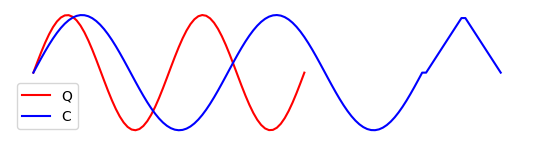

In [56]:
fig, ax1 = plt.subplots(figsize=(6, 2))
plt.plot(q, color='red', label='Q')
plt.plot(c, color='blue', label='C')
# plt.title('C vs. Q')
plt.xlabel('Time steps')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.axis('off')
plt.savefig("../figures/us-prefix.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [58]:
c_prefix = c[:100]
c_prefix_scaled = nearest_neighbor_interpolation(c_prefix, len(q))

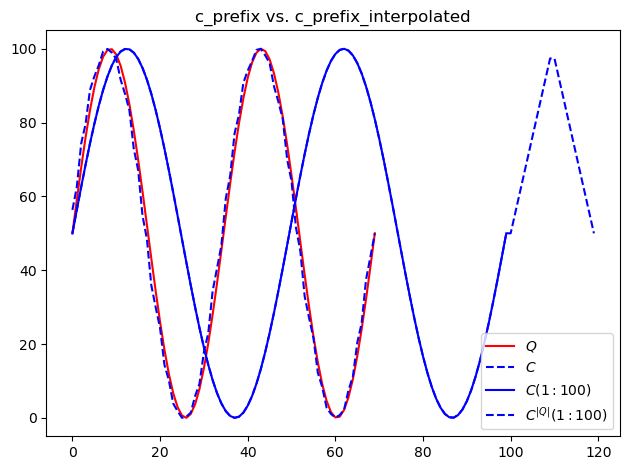

In [59]:
plt.plot(q, color='red', label='$Q$')
plt.plot(c, color='blue', linestyle='--', label='$C$')
plt.plot(c_prefix, color='blue', label='$C(1:100)$')
plt.plot(c_prefix_scaled, linestyle='--', color='blue', label='$C^{|Q|}(1:100)$')
plt.title('c_prefix vs. c_prefix_interpolated')
plt.legend()
plt.tight_layout()
plt.show()


Simply performing dtw on Q and C returns a bad result.

As shown in the above graph, Q and scaled C(1:100) have a good match.

In [83]:
euclidean_distance(q, c_prefix_scaled)

np.float64(27.047409139811432)

In [16]:
import math
def us_distance(Q, C, l):
    m = len(Q)
    n = len(C)
    L = min(np.ceil(l*m), n)
    best_so_far = np.inf
    for k in range(math.ceil(m/l), min(math.ceil(l*m), n)+1):
        C_prefix = C[:k]   
        C_prefix_scaled = nearest_neighbor_interpolation(C_prefix, L)
        Q_scaled = nearest_neighbor_interpolation(Q, L)
        us_dist = euclidean_distance(Q_scaled, C_prefix_scaled)
        if us_dist < best_so_far:
            best_so_far = us_dist
            best_k = k
    return best_so_far, best_k


In [206]:
l = 2 # scaling_factor 
best_so_far, best_k = us_distance(q, c, l)

In [207]:
best_so_far, best_k, best_k/m*100 # best_k/m*100 is the best scaling factor

(np.float64(26.169276613676363), 100, 142.85714285714286)

In [86]:
def _ud_p(Q, C, l, r = 0.1):
    m = len(Q)
    n = len(C)
    L = min(np.ceil(l*m), n)

    Q_scaled = nearest_neighbor_interpolation(Q, L)
    C_scaled = nearest_neighbor_interpolation(C, L)
    dist = pyts_dtw(Q_scaled, C_scaled, method='sakoechiba', options={'window_size': r})
    return dist


In [29]:
_ud_p(x, y, 2)

2.0

In [208]:
def ud_distance(Q, C, l):
    m = len(Q)
    n = len(C)
    L = min(np.ceil(l*m), n)
    best_so_far = np.inf
    for k in range(math.ceil(m/l), min(math.ceil(l*m), n)+1):
        C_prefix = C[:k]   
        C_prefix_scaled = nearest_neighbor_interpolation(C_prefix, L)
        Q_scaled = nearest_neighbor_interpolation(Q, L)
        ud_dist = dtw_distance(Q_scaled, C_prefix_scaled)
        if ud_dist < best_so_far:
            best_so_far = ud_dist
            best_k = k
    return best_so_far, best_k

In [209]:
best_so_far, best_k = ud_distance(q, c, l)

In [210]:
best_so_far, best_k, best_k/m*100 # best_k/m*100 is the best scaling factor

(415.0806592313095, 101, 144.28571428571428)

## 3.2 Dynamic Time Warping (DTW)

/Users/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


dtw_sakoechiba: 430.8925295452164
dtw_itakura: 430.9376805945829


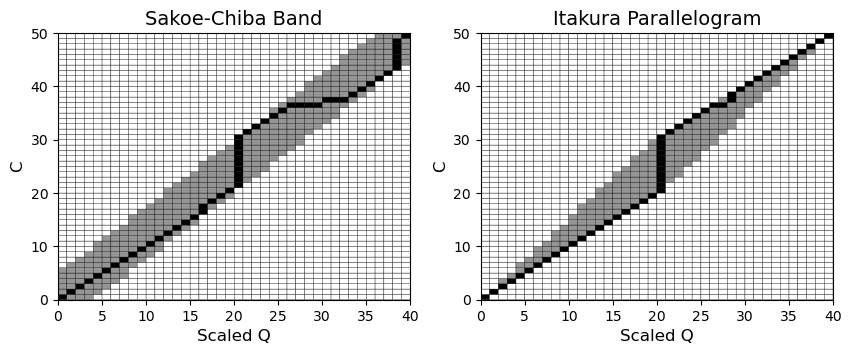

In [264]:
x = q_scaled[:50]
y = c[:50]
# x = q_scaled[:50]
# y = c[:50]
# x = np.array([1, 2, 3, 4])
# y = np.array([5, 6, 6, 7, 8, 8, 8])

# https://pyts.readthedocs.io/en/stable/auto_examples/metrics/plot_dtw.html
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.metrics import dtw, itakura_parallelogram, sakoe_chiba_band
from pyts.metrics.dtw import (cost_matrix, accumulated_cost_matrix,
                              _return_path, _blurred_path_region)

# Parameters
# X, _, _, _ = load_gunpoint(return_X_y=True)
# x, y = X[0], X[1]
# To compare time series of different lengths, we remove some observations
# mask = np.ones(x.size)
# mask[::5] = 0
# y = y[mask.astype(bool)]
n_timestamps_1, n_timestamps_2 = x.size, y.size

plt.figure(figsize=(10, 8))
timestamps_1 = np.arange(n_timestamps_1 + 1)
timestamps_2 = np.arange(n_timestamps_2 + 1)

# Dynamic Time Warping: sakoechiba
# window_size = 0.1
window_size = 0.1

dtw_sakoechiba, path_sakoechiba = dtw(
    x, y, dist='square', method='sakoechiba',
    options={'window_size': window_size}, return_path=True
)
band = sakoe_chiba_band(n_timestamps_1, n_timestamps_2,
                        window_size=window_size)
matrix_sakoechiba = np.zeros((n_timestamps_1, n_timestamps_2))
for i in range(n_timestamps_1):
    matrix_sakoechiba[i, np.arange(*band[:, i])] = 0.5
matrix_sakoechiba[tuple(path_sakoechiba)] = 1.

plt.subplot(2, 2, 1)
plt.pcolor(timestamps_1, timestamps_2, matrix_sakoechiba.T,
           edgecolors='k', cmap='Greys')
plt.xlabel('Scaled Q', fontsize=12)
plt.ylabel('C', fontsize=12)
plt.title('Sakoe-Chiba Band', fontsize=14)
print("dtw_sakoechiba:", dtw_sakoechiba)

# Dynamic Time Warping: itakura
slope = 1.2
dtw_itakura, path_itakura = dtw(
    x, y, dist='square', method='itakura',
    options={'max_slope': slope}, return_path=True
)
parallelogram = itakura_parallelogram(n_timestamps_1, n_timestamps_2,
                                      max_slope=slope)
matrix_itakura = np.zeros((n_timestamps_1, n_timestamps_2))
for i in range(n_timestamps_1):
    matrix_itakura[i, np.arange(*parallelogram[:, i])] = 0.5
matrix_itakura[tuple(path_itakura)] = 1.
plt.subplot(2, 2, 2)
plt.pcolor(timestamps_1, timestamps_2, matrix_itakura.T,
           edgecolors='k', cmap='Greys')
plt.xlabel('Scaled Q', fontsize=12)
plt.ylabel('C', fontsize=12)
plt.title("Itakura Parallelogram",
          fontsize=14)
print("dtw_itakura:", dtw_itakura)

# plt.suptitle("Dynamic Time Warping", y=0.995, fontsize=17)
plt.subplots_adjust(top=0.91, hspace=0.4)
# plt.grid(False)
plt.savefig("../figures/dtw-matrix.pdf", format="pdf", bbox_inches="tight")
plt.show()


## 3.5 Lower Bounds for Distance Measures

In [213]:
# Sample sequences
np.random.seed(18)
q = np.sin(np.linspace(0, 4 * np.pi, 100))
c = q + np.random.normal(0, 0.4, size=100)

In [214]:
def lb_shen_argmin_q(q, c, r):
    m = len(q)
    n = len(c)
    dist = lambda a, b: (a - b)**2

    # total = dist(q[0], c[0]) + dist(q[-1], c[-1])
    window_contrib = []
    # window_contrib.append((0, 0)) 
    window_contrib.append(q[0]) 
    

    for j in range(1, n - 1):
        start = max(0, j - r)
        end = min(m, j + r + 1)
        q_window = q[start:end]
        argmin = np.argmin([dist(c[j], qk) for qk in q_window]) #qk = q_argmin
        # window_contrib.append((j, q_window[argmin]))
        window_contrib.append(q_window[argmin])
        # total += min_dist
    window_contrib.append(q[-1]) 
    return window_contrib

100
100


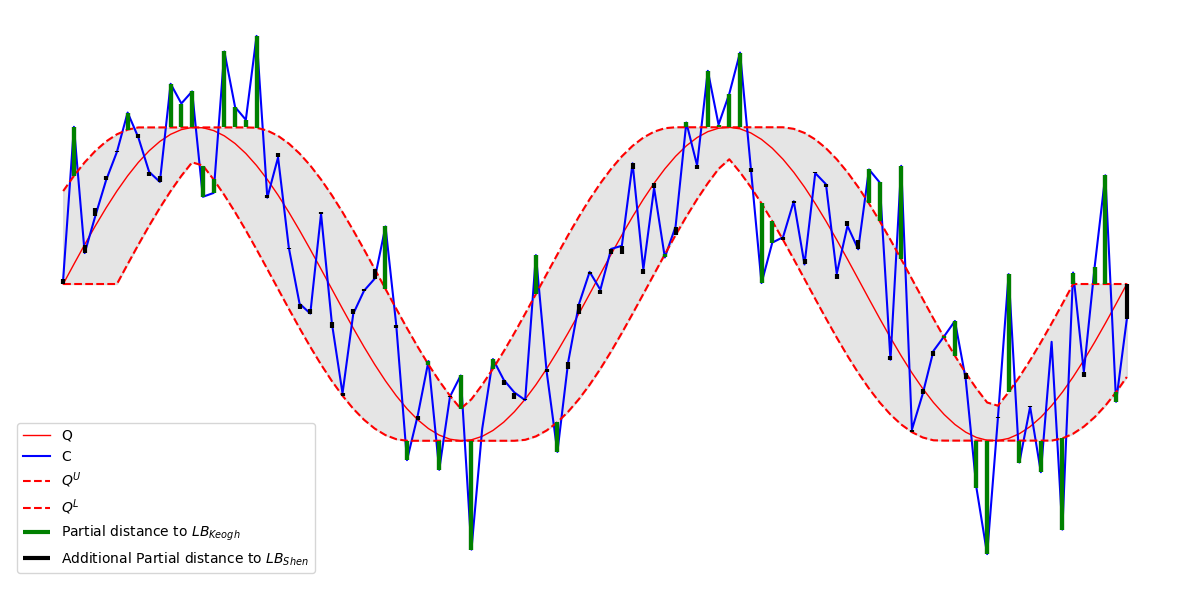

In [215]:

def lb_keogh_envelope(ts, radius):
    n = len(ts)
    upper = np.zeros(n)
    lower = np.zeros(n)
    for i in range(n):
        start = max(0, i - radius)
        end = min(n, i + radius + 1)
        lower[i] = np.min(ts[start:end])
        upper[i] = np.max(ts[start:end])
    return lower, upper

def lb_keogh(ts_query, ts_candidate, radius):
    lower, upper = lb_keogh_envelope(ts_query, radius)
    lb_sum = 0
    for i in range(len(ts_candidate)):
        if ts_candidate[i] > upper[i]:
            lb_sum += (ts_candidate[i] - upper[i])**2
        elif ts_candidate[i] < lower[i]:
            lb_sum += (ts_candidate[i] - lower[i])**2
    return np.sqrt(lb_sum)


def plot_lb_keogh_full(q, c, radius):
    x = np.arange(len(q))
    lower, upper = lb_keogh_envelope(q, radius)
    lb = lb_keogh(q, c, radius)

    plt.figure(figsize=(12, 6))

    # Plot Q and C
    plt.plot(x, q, label='Q', color='red', linewidth=1)
    plt.plot(x, c, label='C', color='blue', linewidth=1.5)
    # Plot envelope
    plt.plot(x, upper, label='$Q^U$', linestyle='--', color='red', linewidth=1.5)
    plt.plot(x, lower, label='$Q^L$', linestyle='--', color='red', linewidth=1.5)
    plt.fill_between(x, lower, upper, color='gray', alpha=0.2)
    # Vertical bars
    # Old version
    # for i in x:
    #     if c[i] > upper[i]:
    #         plt.vlines(i, upper[i], c[i], color='black', linewidth=1.5)
    #     elif c[i] < lower[i]:
    #         plt.vlines(i, lower[i], c[i], color='black', linewidth=1.5)

    print(len(lower))
    first_pair_smallest_elts_last_pair = lb_shen_argmin_q(q, c, r=5)
    print(len(np.array(first_pair_smallest_elts_last_pair)))
    plt.vlines(np.arange(len(q)), c, first_pair_smallest_elts_last_pair,
           label='Additional Partial distance to $LB_{Shen}$', color='black', linewidth=3.0)
    # Elegant version
    plt.vlines(np.arange(len(q)), c, np.clip(c, lower, upper),
           label='Partial distance to $LB_{Keogh}$', color='green', linewidth=3.0)

    # plt.title(f"LB_Keogh Visualization\nLower Bound = {lb:.4f}")
    # plt.xlabel("Time Index")
    # plt.ylabel("Value")

    # Get all legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    # Swap the last two (assuming they are in the expected order)
    handles[-2], handles[-1] = handles[-1], handles[-2]
    labels[-2], labels[-1] = labels[-1], labels[-2]

    plt.legend(handles=handles, labels=labels, loc='lower left')
    # plt.legend(loc='upper right')
    # plt.grid(True)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig("../figures/lb_keogh-lb_shen.pdf", format="pdf", bbox_inches="tight")
    plt.show()



plot_lb_keogh_full(q, c, radius=5)


# 4 Piecewise Scaling & Dynamic Time Warping (PD)

# 5 Lower Bound of PD

# 6 Experimental Evaluation

# ---

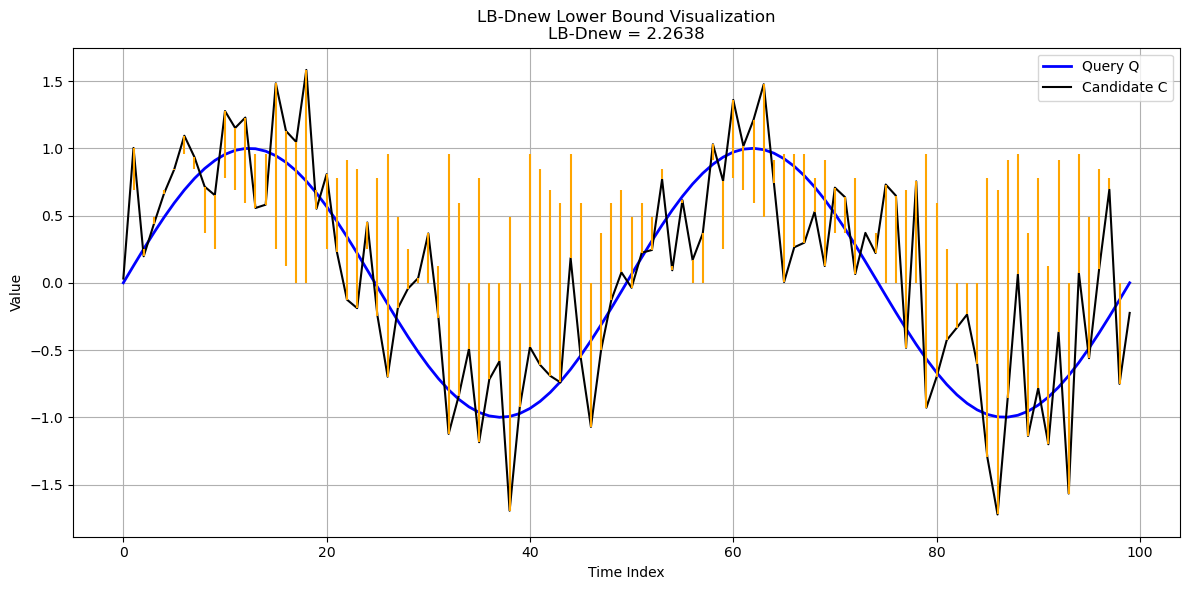

In [216]:
import numpy as np
import matplotlib.pyplot as plt

def lb_dnew(q, c, r):
    n = len(c)
    m = len(q)
    dist = lambda a, b: (a - b)**2

    total = dist(q[0], c[0]) + dist(q[-1], c[-1])
    window_contrib = []

    for j in range(1, n - 1):
        start = max(0, j - r)
        end = min(m, j + r + 1)
        local_window = q[start:end]
        min_dist = np.min([dist(c[j], qk) for qk in local_window])
        window_contrib.append((j, min_dist))
        total += min_dist

    return total, window_contrib

def plot_lb_dnew(q, c, r):
    lb, contribs = lb_dnew(q, c, r)
    x = np.arange(len(c))

    plt.figure(figsize=(12, 6))
    plt.plot(q, label="Query Q", color="blue", linewidth=2)
    plt.plot(c, label="Candidate C", color="black", linewidth=1.5)

    # Red vertical bars showing min distance from c[j] to q[j±r]
    for j, min_d in contribs:
        if min_d > 0:
            closest_q_val = q[np.argmin([abs(c[j] - qk) for qk in q[max(0, j - r):min(len(q), j + r + 1)]])]
            plt.vlines(j, c[j], closest_q_val, color='orange', linewidth=1.5)

    plt.title(f"LB-Dnew Lower Bound Visualization\nLB-Dnew = {np.sqrt(lb):.4f}")
    plt.xlabel("Time Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example sequences
np.random.seed(18)
q = np.sin(np.linspace(0, 4 * np.pi, 100))
c = q + np.random.normal(0, 0.4, size=100)

plot_lb_dnew(q, c, r=5)


In [217]:
q = np.array([1,1,1,2,2,2])
c = np.array([1,1,1,1,2,2,2,2,5,6,7])

In [218]:
distance, paths = dtw.warping_paths(time_series_a, time_series_b, use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)

NameError: name 'time_series_a' is not defined

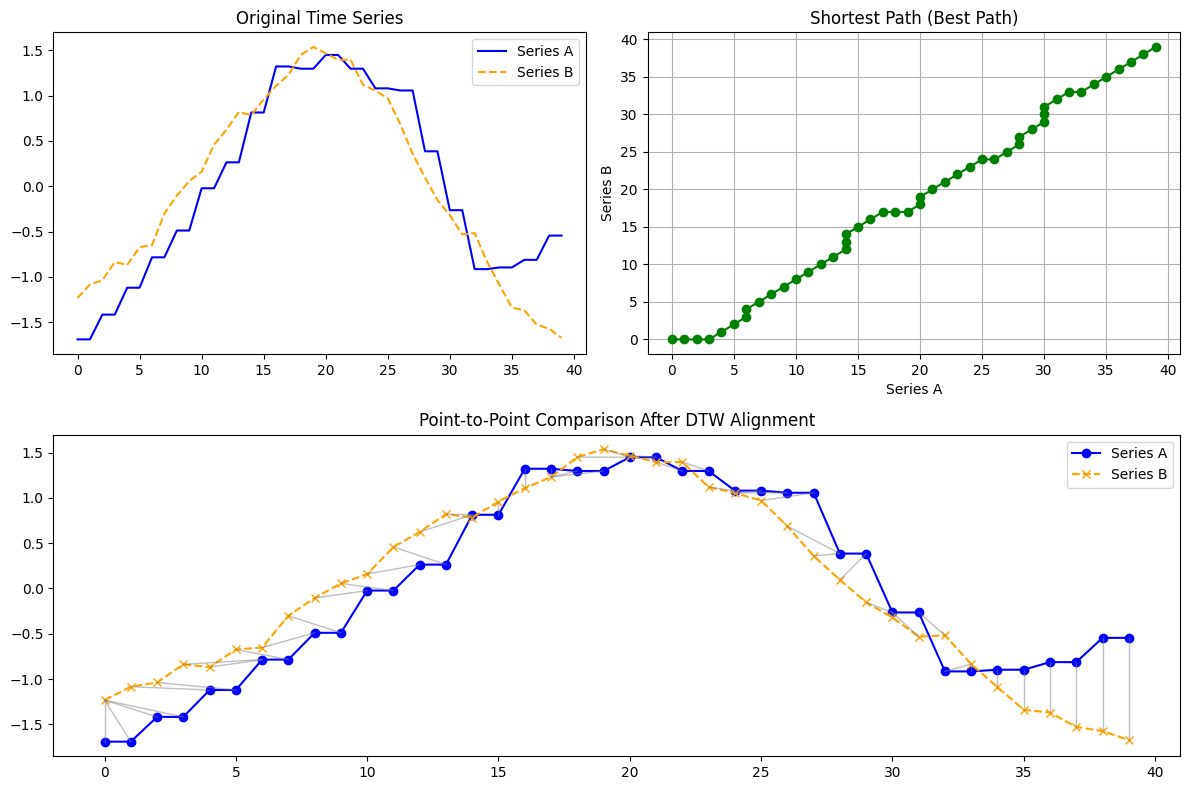

In [ ]:
# https://medium.com/@markstent/dynamic-time-warping-a8c5027defb6
plt.figure(figsize=(12, 8))

# Original Time Series Plot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.plot(time_series_a, label='Series A', color='blue')
ax1.plot(time_series_b, label='Series B', linestyle='--',color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

# Shortest Path Plot (Cost Matrix with the path)
# In this example, only the path is plotted, not the entire cost matrix.

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(np.array(best_path)[:, 0], np.array(best_path)[:, 1], 'green', marker='o', linestyle='-')
ax2.set_title('Shortest Path (Best Path)')
ax2.set_xlabel('Series A')
ax2.set_ylabel('Series B')
ax2.grid(True)

# Point-to-Point Comparison Plot
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3.plot(time_series_a, label='Series A', color='blue', marker='o')
ax3.plot(time_series_b, label='Series B', color='orange', marker='x', linestyle='--')
for a, b in best_path:
    ax3.plot([a, b], [time_series_a[a], time_series_b[b]], color='grey', linestyle='-', linewidth=1, alpha = 0.5)
ax3.set_title('Point-to-Point Comparison After DTW Alignment')
ax3.legend()

plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({
    'Metric': ['DTW Similarity Score'],
    'Value': [similarity_score]
})

results_df['Description'] = [
    "Lower scores indicate greater similarity between the time series."
]

results_df

Metric     Value  \
0  DTW Similarity Score  0.045226   

                                         Description  
0  Lower scores indicate greater similarity betwe...

In [ ]:
print(f" distance = {distance} length of path = {len(best_path)} ration = {distance/len(best_path)}")

 distance = 2.1256387200688422 length of path = 47 ration = 0.04522635574614558


In [ ]:
###

In [ ]:
###

In [ ]:
s1 = [10794.800, 125.763, 195.8140, 790.387]
s2 = [1598.520, 260.395, 326.97900, 1144.470]

In [ ]:
distance, paths = dtw.warping_paths(s1, s2, use_c=False)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)

In [ ]:

print(len(best_path))
print(distance)

4
9205.013342844104


In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(50, 150, 50, 150)

In [ ]:
dtw([1, 2, 3], [1., 2., 2., 3., 4.])

1.0

# tslearn

In [ ]:
from tslearn import metrics
ts1 = [1, 2, 3, 2, 1]
ts2 = [0, 0, 0, 0, 0]
env_low, env_up = metrics.lb_envelope(ts1, radius=1)

In [ ]:
metrics.lb_keogh(ts_query=ts2, envelope_candidate=(env_low, env_up))

np.float64(2.8284271247461903)

In [ ]:
from tslearn.metrics import euclidean_distance

# Two univariate time series (must be same length)
ts1 = [1, 2, 3, 4]
ts2 = [1, 2, 4, 3]

dist = euclidean_distance(ts1, ts2)
print("ED =", dist)


ImportError: cannot import name 'euclidean_distance' from 'tslearn.metrics' (/Users/cyuab/miniconda3/envs/ksfdtw/lib/python3.12/site-packages/tslearn/metrics/__init__.py)

In [96]:
# Import dataset
import numpy as np
from tslearn.datasets import UCR_UEA_datasets
import matplotlib.pyplot as plt

# Load dataset (e.g., GunPoint)
ucr = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = ucr.load_dataset("GunPoint")
X_train = X_train.squeeze()


In [98]:
X_train[49]

array([-1.4357199 , -1.4322717 , -1.4329285 , -1.4316413 , -1.4325953 ,
       -1.432303  , -1.4334516 , -1.4324265 , -1.4332729 , -1.429953  ,
       -1.4296726 , -1.4291101 , -1.4292611 , -1.4266512 , -1.426664  ,
       -1.4237981 , -1.4258321 , -1.4261731 , -1.425976  , -1.4103294 ,
       -1.3346269 , -1.2088542 , -1.0003547 , -0.75365711, -0.46416938,
       -0.19393205,  0.00215441,  0.25182777,  0.40863902,  0.54002986,
        0.6245556 ,  0.68736082,  0.71154432,  0.73640378,  0.73681049,
        0.74538794,  0.74814274,  0.75259649,  0.77412086,  0.77489819,
        0.77176965,  0.78379451,  0.78556018,  0.78829486,  0.790786  ,
        0.78666364,  0.78842596,  0.78669538,  0.78859965,  0.7945724 ,
        0.78568312,  0.78784802,  0.79121161,  0.78588989,  0.78513379,
        0.79321914,  0.79275118,  0.78998297,  0.79244662,  0.79109079,
        0.79155998,  0.79274213,  0.79131007,  0.79359836,  0.79334957,
        0.7844746 ,  0.78340836,  0.78523584,  0.79023545,  0.78

Best match index: 13, Label: 1
Distance: 0.5697


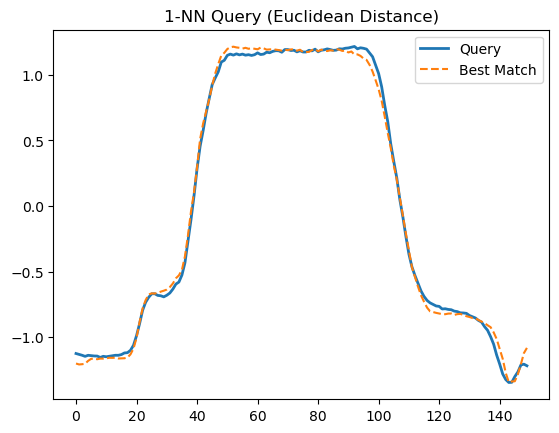

In [99]:

# Squeeze to 2D (n_samples, time_length)
X_train = X_train.squeeze()
X_test = X_test.squeeze()

# Use first test series as query
query_ts = X_test[0]

# Compute Euclidean distances to all training samples
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

distances = np.array([euclidean_distance(query_ts, x) for x in X_train])

# Find best match
best_idx = np.argmin(distances)
best_match = X_train[best_idx]

print(f"Best match index: {best_idx}, Label: {y_train[best_idx]}")
print(f"Distance: {distances[best_idx]:.4f}")

# Plot
plt.plot(query_ts, label="Query", linewidth=2)
plt.plot(best_match, label="Best Match", linestyle="--")
plt.legend()
plt.title("1-NN Query (Euclidean Distance)")
plt.show()


# Testing

In [ ]:
def nearest_neighbor_interpolation(ts, L):
    ts = np.asarray(ts)
    k = len(ts)
    indices = [int(np.ceil(j * k / L)) - 1 for j in range(1, L + 1)]  # Why -1? 1-based (in the paper) to 0-based (default in Python)
    return ts[indices]

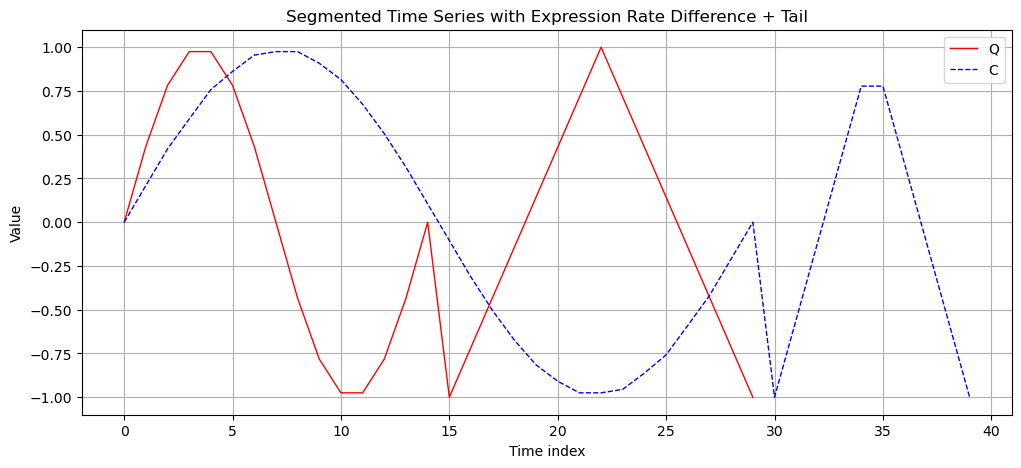

(30, 40)

In [363]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth

# Step 1: Create segments
def generate_segments():
    s1 = np.sin(np.linspace(0, 2 * np.pi, 15)) 
    # s1 = np.linspace(0, 1, 15)
    s2 = sawtooth(np.linspace(0, 2 * np.pi, 15), 0.5)  # Triangle wave (periodic)
    # s2 = np.concatenate([np.ones(10), np.linspace(1, 0.5, 5)])
    # s3 = np.tile([0, 1], 15)
    tail = np.linspace(1, 0, 30)
    # return s1, s2, s3, tail
    return s1, s2, tail

# Step 3: Compose sequences
def create_series(with_tail=False):
    # s1, s2, s3, tail = generate_segments()
    s1, s2, tail = generate_segments()
    # Q = np.concatenate([s1, s2, s3])
    Q = np.concatenate([s1, s2])
    C = np.concatenate([
        linear_interpolation(s1, int(len(s1)*2)),
        linear_interpolation(s2, int(len(s2)*0.7)),
        # nearest_neighbor_interpolation(s3, int(len(s3)*1.2))
    ])
    if with_tail:
        C = np.concatenate([C, tail])
    return Q, C

Q, C = create_series(False)

# Step 4: Plotting with ground truth segment boundaries
def plot_segmented_series(Q, C):
    plt.figure(figsize=(12, 5))
    plt.plot(Q, label="Q", color='red', linewidth=1)
    plt.plot(C, label="C", color='blue', linestyle='--', linewidth=1)

    # for idx in q_segments[1:-1]:  # skip 0 and end
    #     plt.axvline(idx, color='blue', linestyle='--', alpha=0.5)
    # for idx in c_segments[1:-1]:
    #     plt.axvline(idx, color='red', linestyle=':', alpha=0.5)

    plt.title("Segmented Time Series with Expression Rate Difference + Tail")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Time index")
    plt.ylabel("Value")
    plt.show()

# # Step 5: Ground truth (simulated for this synthetic case)
# q_segments = [0, 30, 60, 90]  # Original segments in Q
# c_segments = [0,
#               len(scale_segment(np.linspace(0, 1, 30), 0.7)),
#               len(scale_segment(np.linspace(0, 1, 30), 0.7)) +
#               len(scale_segment(np.ones(30), 1.3)),
#               len(C)]  # including tail

plot_segmented_series(Q, C)
len(Q), len(C)


In [365]:
def _pd_helper(Q, C, l, P):
    test = 0
    m, n = len(Q), len(C)
    D = np.full((m, n, P), np.inf)
    backtrack = np.full((m, n, P, 2), -1, dtype=int)  # Store (i_prime, j_prime)
    
    # Base case = Consider only one piece
    p = 0
    for i in range(0, m): # ranges from 0 to m-1
        for j in range(0, n):
            if (2*(i-0) < (j-0)) or ((i-0)/2 > (j-0)):
                continue
            L = min(np.ceil(l*(i+1)), j+1)
            Q_scaled = nearest_neighbor_interpolation(Q[:i+1], L)
            C_scaled = nearest_neighbor_interpolation(C[:j+1], L)
            D[i, j, p] = dtw.distance(Q_scaled, C_scaled) # ending index is exclusive
            backtrack[i, j, 0] = [0, 0]  # No previous split in base case
            test = test + 1
            print(i, j)
    # Recursive case
    for p in range(1, P):
        for i in range(0, m):
            for j in range(0, n):                
                best_so_far = np.inf
                # Iterate over all previous indices
                for i_prime in range(0, i+1):
                    for j_prime in range(0, j+1):
                        if (2*(i-i_prime) < (j-j_prime)) or ((i-i_prime)/2 > (j-j_prime)):
                            continue
                        L = min(np.ceil(l*((i-i_prime)+1)), (j-j_prime)+1)
                        Q_scaled = nearest_neighbor_interpolation(Q[i_prime:i+1], L)
                        C_scaled = nearest_neighbor_interpolation(C[j_prime:j+1], L)
                        dist = D[i_prime, j_prime, p-1] + dtw.distance(Q_scaled, C_scaled)
                        if dist < best_so_far:
                            best_so_far = dist
                            best_indices = (i_prime, j_prime)
                        print(i, i_prime, "len of Q", i-i_prime, j, j_prime, "len of C", j-j_prime)
                        test = test + 1
                    # print(f"i={i}, j={j}, p={p}, best_so_far={best_so_far}, best_indices={best_indices}")
                D[i, j, p] = best_so_far
                backtrack[i, j, p] = best_indices
    print(f"Total iterations: {test}")
    return D, backtrack

In [366]:
D, backtrack = _pd_helper(Q, C, 2, 2)

0 0
1 1
1 2
2 1
2 2
2 3
2 4
3 2
3 3
3 4
3 5
3 6
4 2
4 3
4 4
4 5
4 6
4 7
4 8
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
11 20
11 21
11 22
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
13 16
13 17
13 18
13 19
13 20
13 21
13 22
13 23
13 24
13 25
13 26
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24
14 25
14 26
14 27
14 28
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15
15 16
15 17
15 18
15 19
15 20
15 21
15 22
15 23
15 24
15 25
15 26
15 27
15 28
15 29


In [367]:
D[:, :, 0]

array([[0.        ,        inf,        inf, ...,        inf,        inf,
               inf],
       [       inf, 0.22442262, 0.21052708, ...,        inf,        inf,
               inf],
       [       inf, 0.71823599, 0.41928622, ...,        inf,        inf,
               inf],
       ...,
       [       inf,        inf,        inf, ..., 0.8871961 , 0.76257693,
        0.92555705],
       [       inf,        inf,        inf, ..., 1.18910684, 0.73154924,
        0.75594012],
       [       inf,        inf,        inf, ..., 1.59206168, 0.97021231,
        0.71412116]], shape=(30, 40))

In [368]:
D[-1, -1, -1]

np.float64(0.7141211573930564)

In [375]:
backtrack

array([[[[ 0,  0],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]],

        ...,

        [[-1, -1],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]]],


       [[[-1, -1],
         [ 0,  0]],

        [[ 0,  0],
         [ 0,  0]],

        [[ 0,  0],
         [ 0,  0]],

        ...,

        [[-1, -1],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]]],


       [[[-1, -1],
         [ 0,  0]],

        [[ 0,  0],
         [ 0,  0]],

        [[ 0,  0],
         [ 0,  0]],

        ...,

        [[-1, -1],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]]],


       ...,


       [[[-1, -1],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]],

        [[-1, -1],
         [ 0,  0]],

        ...,

        [[ 0,  0],
         [ 0,  0]],

        [[ 0,  0],
         [ 0,  0]],

    